<a href="https://colab.research.google.com/github/aishwaryarao1104/HeartDiseaseClassification/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the csv file in a dataframe
df = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/heart_disease_prediction/framingham.csv')

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Exploratory Data Analysis

In [ ]:
#checking for null values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

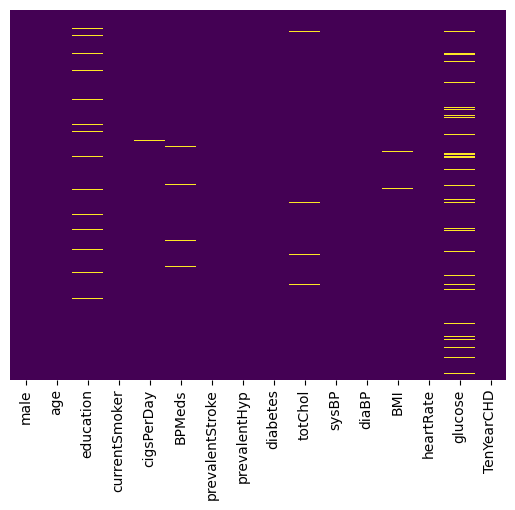

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#checking for duplicates
duplicated = df[df.duplicated()]
duplicated

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


<Axes: xlabel='male', ylabel='cigsPerDay'>

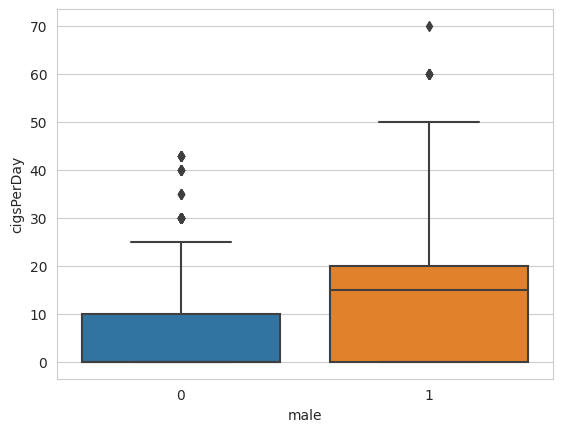

In [ ]:
sns.boxplot(x='male',y='cigsPerDay',data=df)

<Axes: xlabel='TenYearCHD', ylabel='count'>

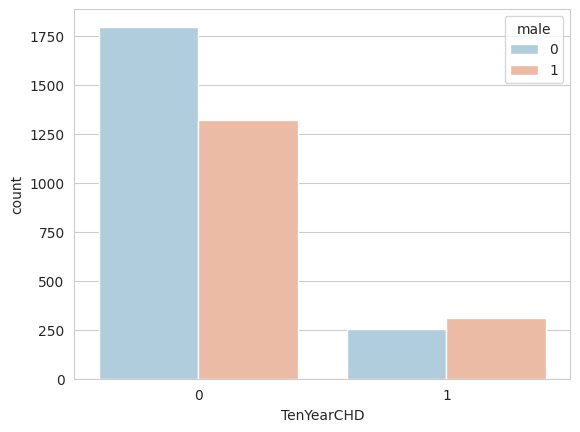

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD',hue='male',data=df,palette='RdBu_r')

We can see that there is almost equal distribution of male and female patients having heart disease , rather patients who don't have disease are mostly females.

<Axes: xlabel='TenYearCHD', ylabel='count'>

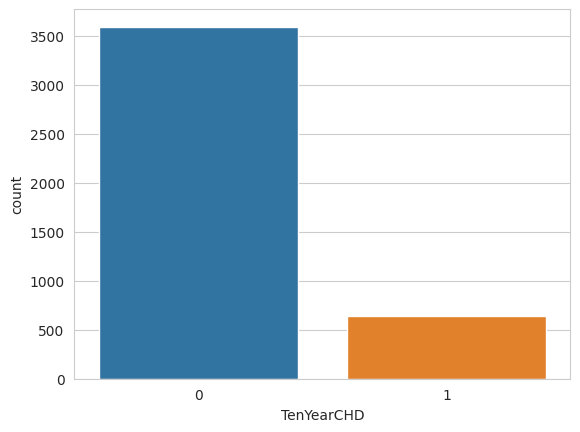

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD',data=df)

<Axes: xlabel='education', ylabel='count'>

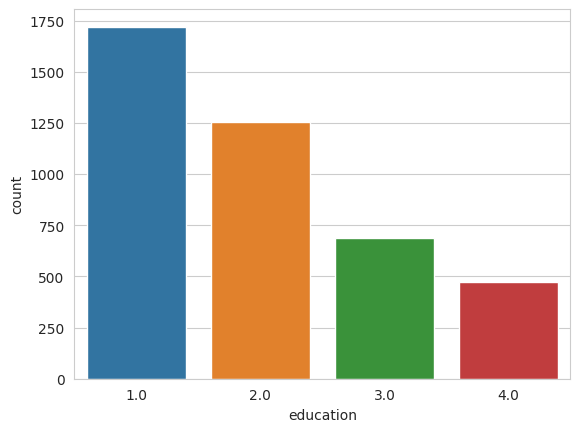

In [ ]:
sns.countplot(x='education',data=df)

<Axes: >

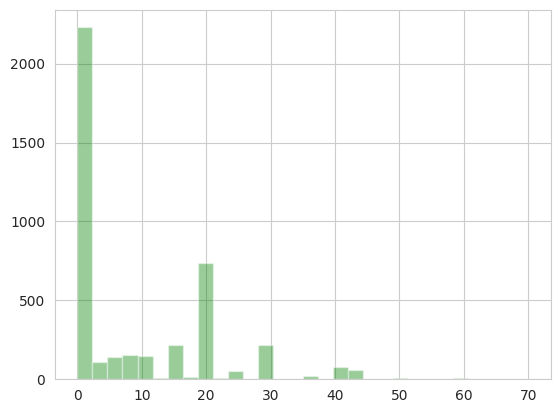

In [ ]:
df['cigsPerDay'].hist(color='green',bins=30,alpha=0.4)

<Axes: >

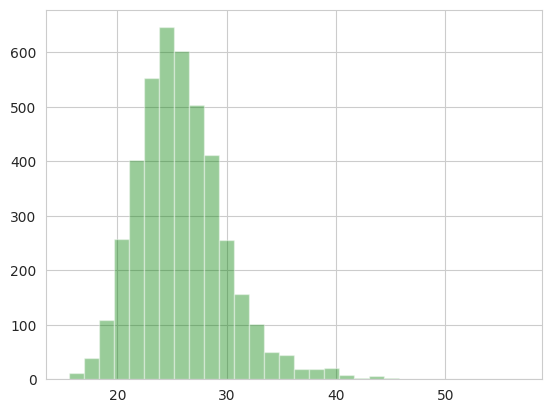

In [ ]:
df['BMI'].hist(color='green',bins=30,alpha=0.4)

BMI has decent distribution over the data

<Axes: >

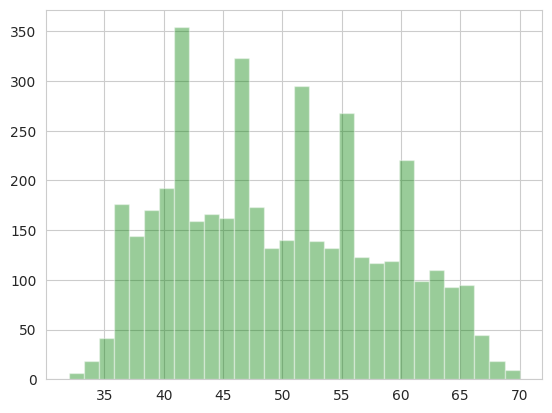

In [ ]:
df['age'].hist(color='green',bins=30,alpha=0.4)

<Axes: >

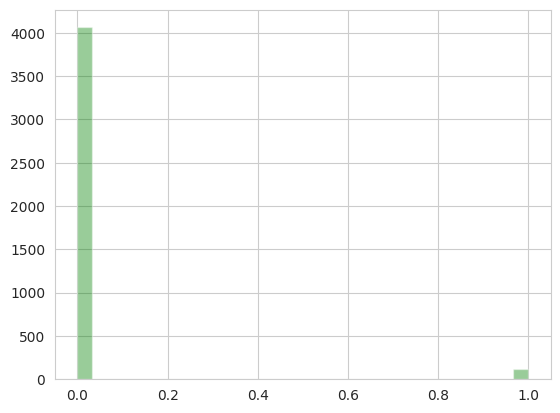

In [ ]:
df['BPMeds'].hist(color='green',bins=30,alpha=0.4)

<Axes: >

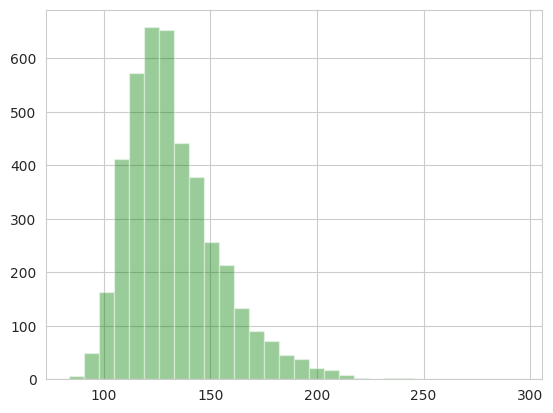

In [ ]:
df['sysBP'].hist(color='green',bins=30,alpha=0.4)

<Axes: >

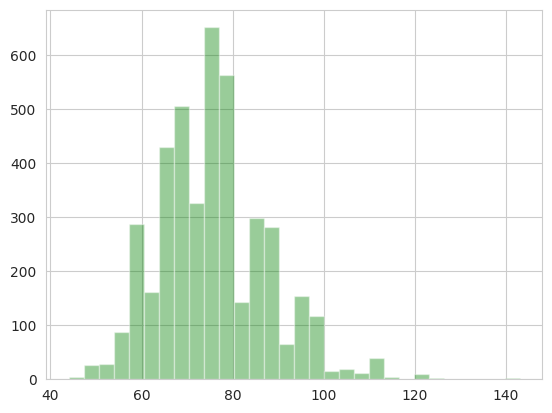

In [ ]:
df['heartRate'].hist(color='green',bins=30,alpha=0.4)

<Axes: >

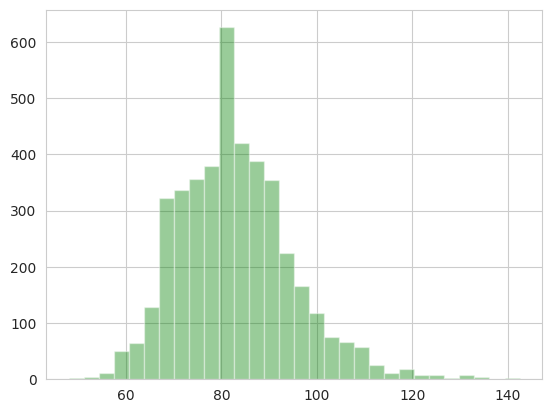

In [ ]:
df['diaBP'].hist(color='green',bins=30,alpha=0.4)

<Axes: >

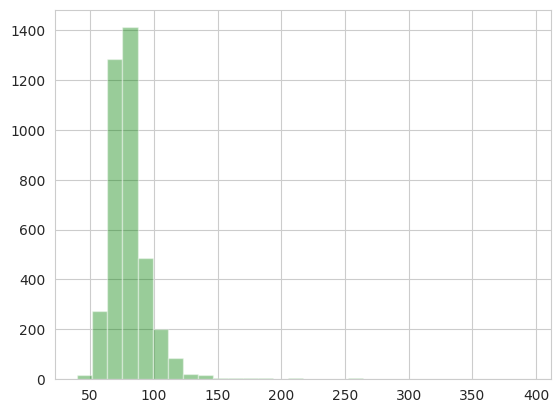

In [ ]:
df['glucose'].hist(color='green',bins=30,alpha=0.4)

In [ ]:
#From the above histograms "BMI","heartRate","totChol" follows a near symmetric distribution , so I am imputing the null values of these columns,
df['BMI'].fillna(df['BMI'].mean, inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['totChol'].fillna(df['totChol'].mean(), inplace=True)
df.dropna(inplace=True)

In [ ]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.6,67.0,72.0,0


<ipython-input-34-f939f917306d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


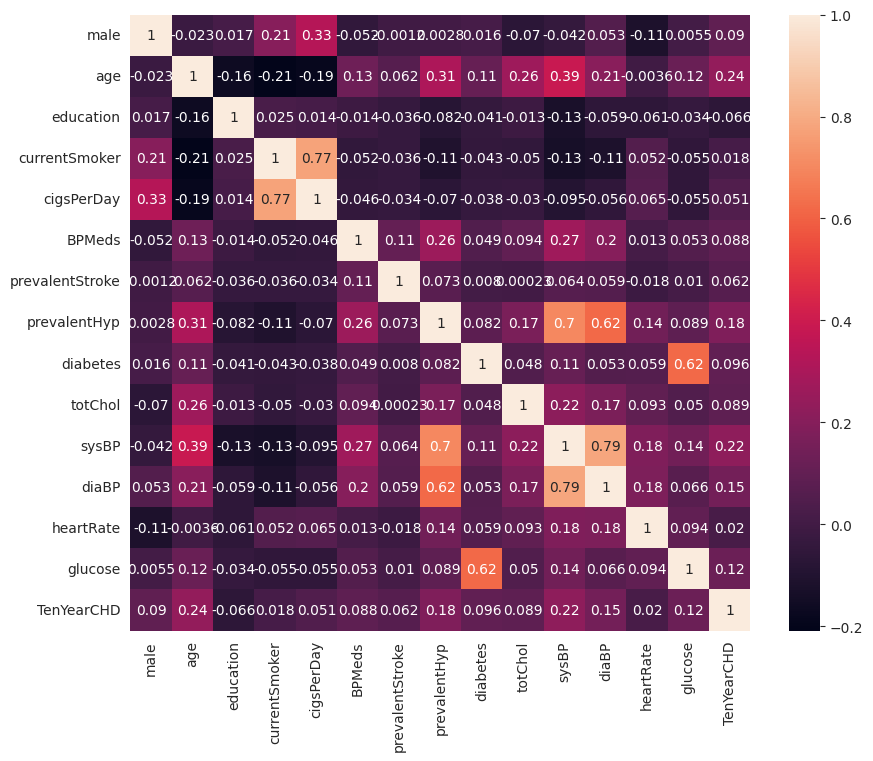

In [ ]:
plt.figure(figsize=(10, 8))
df_corr = df.corr()
sns.heatmap(df_corr,annot=True)
plt.show()

From the Heatmap, it is evident that education column is negatively correlated to the output column "TenYearCHD",
so I have decided to drop it permanently as it will not help in our analysis.

In [ ]:
df.drop(labels = ['education'],axis=1,inplace=True)

In [ ]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0


In [ ]:
df.to_csv('/content/drive/MyDrive/AMLBS_Assignments/heart_disease_prediction/heart_filtered_dataset.csv')

NameError: ignored

# Feature Selection and Sampling

In [ ]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/heart_disease_prediction/heart_filtered_dataset.csv')

In [ ]:
data

,Unnamed: 0,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.1,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3677,4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3678,4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
3679,4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.6,67.0,72.0,0


In [ ]:
#Loading the filtered data from the EDA part and perform preprocessing on it
data = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/heart_disease_prediction/heart_filtered_dataset.csv')
data = data.drop(columns=['Unnamed: 0'])
data['BMI'] = pd.to_numeric(data['BMI'], errors='coerce')
data['BMI'].fillna(data['BMI'].median(), inplace=True)


In [ ]:
#Preparing the data for normalization
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']


In [ ]:
#Performing normalization using Standard Scaler with mean=0 and Variance=1
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

X_normalized_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.122350,-1.231802,-0.978232,-0.756710,-0.17633,-0.079294,-0.672788,-0.167108,-0.948692,-1.191643,-1.076309,0.292680,0.356098,-0.203913
1,-0.890988,-0.416098,-0.978232,-0.756710,-0.17633,-0.079294,-0.672788,-0.167108,0.299956,-0.514054,-0.157774,0.726543,1.609241,-0.245385
2,1.122350,-0.183040,1.022252,0.923397,-0.17633,-0.079294,-0.672788,-0.167108,0.186443,-0.220433,-0.241277,-0.109137,-0.061616,-0.494217
3,-0.890988,1.331838,1.022252,1.763451,-0.17633,-0.079294,1.486352,-0.167108,-0.267611,0.795950,1.011272,0.689566,-0.897045,0.874361
4,-0.890988,-0.416098,1.022252,1.175414,-0.17633,-0.079294,-0.672788,-0.167108,1.094551,-0.107501,0.092736,-0.661326,0.773813,0.127864


In [ ]:
#Extracting the covariance matrix
covariance_matrix = np.cov(X_normalized_df.T)

covariance_matrix

array([[ 1.00027174e+00, -2.26823242e-02,  2.06223342e-01,
         3.31284189e-01, -5.15780161e-02, -1.23921990e-03,
         2.83909413e-03,  1.59710939e-02, -6.96722647e-02,
        -4.23270925e-02,  5.35022032e-02,  7.32880400e-02,
        -1.14978000e-01,  5.50033930e-03],
       [-2.26823242e-02,  1.00027174e+00, -2.08117110e-01,
        -1.88172408e-01,  1.33622663e-01,  6.18339575e-02,
         3.08577472e-01,  1.10621541e-01,  2.64837913e-01,
         3.90125747e-01,  2.09727353e-01,  1.37126699e-01,
        -3.55382380e-03,  1.20648996e-01],
       [ 2.06223342e-01, -2.08117110e-01,  1.00027174e+00,
         7.73759135e-01, -5.17461510e-02, -3.61971024e-02,
        -1.07842529e-01, -4.31352664e-02, -5.04918258e-02,
        -1.33355643e-01, -1.14230969e-01, -1.58594566e-01,
         5.25134949e-02, -5.47015290e-02],
       [ 3.31284189e-01, -1.88172408e-01,  7.73759135e-01,
         1.00027174e+00, -4.61687450e-02, -3.39466802e-02,
        -7.03355960e-02, -3.77426660e-02, -3.

In [ ]:
# Calculating eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvalues, eigenvectors


(array([3.20236993, 1.88441729, 1.56868445, 0.17357698, 0.21248405,
        0.37366936, 0.38889454, 1.1245279 , 1.04896452, 1.02205931,
        0.62574745, 0.6924959 , 0.8866441 , 0.79926856]),
 array([[ 5.25170494e-02, -3.64638689e-01,  4.66952519e-02,
         -7.91460041e-02, -1.25021721e-01, -2.04603805e-02,
          2.34445240e-02,  5.22453932e-01,  2.54683156e-01,
         -2.10000398e-01, -3.44126378e-01,  5.64669882e-01,
          1.39474507e-01,  2.42359114e-02],
        [-2.93512053e-01,  9.46900133e-02,  2.34257132e-02,
          1.58723285e-01,  9.52738122e-04,  8.16482848e-02,
         -6.92161661e-02,  1.21595203e-01, -2.75839303e-01,
         -4.65246857e-01,  5.77910994e-01,  3.06213877e-01,
          6.10155681e-02, -3.59007096e-01],
        [ 2.00700671e-01, -5.88150557e-01,  4.83276858e-02,
          2.02948144e-02, -6.81140430e-01, -8.08735516e-03,
         -2.43170976e-02, -1.10183646e-01, -1.84538328e-01,
         -9.80391736e-03,  2.11676579e-01, -2.21606881e-01

In [ ]:
# Normalize the eigenvectors
normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

normalized_eigenvectors


array([[ 5.25170494e-02, -3.64638689e-01,  4.66952519e-02,
        -7.91460041e-02, -1.25021721e-01, -2.04603805e-02,
         2.34445240e-02,  5.22453932e-01,  2.54683156e-01,
        -2.10000398e-01, -3.44126378e-01,  5.64669882e-01,
         1.39474507e-01,  2.42359114e-02],
       [-2.93512053e-01,  9.46900133e-02,  2.34257132e-02,
         1.58723285e-01,  9.52738122e-04,  8.16482848e-02,
        -6.92161661e-02,  1.21595203e-01, -2.75839303e-01,
        -4.65246857e-01,  5.77910994e-01,  3.06213877e-01,
         6.10155681e-02, -3.59007096e-01],
       [ 2.00700671e-01, -5.88150557e-01,  4.83276858e-02,
         2.02948144e-02, -6.81140430e-01, -8.08735516e-03,
        -2.43170976e-02, -1.10183646e-01, -1.84538328e-01,
        -9.80391736e-03,  2.11676579e-01, -2.21606881e-01,
        -6.28263968e-02, -4.78227785e-02],
       [ 1.71284777e-01, -6.32505933e-01,  4.09892120e-02,
         1.42561221e-02,  7.19390439e-01,  1.65927527e-02,
        -1.40888896e-02, -3.56994089e-02, -1.

In [ ]:
# Calculate the principal components
PCs = np.dot(X_normalized_df, normalized_eigenvectors)

# Convert to dataframe for visualization
PCs_df = pd.DataFrame(PCs, columns=[f'PC{i+1}' for i in range(len(eigenvalues))])

PCs_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,1.590687,0.982623,0.093545,-0.167695,-0.009876,-0.282480,0.379187,0.582484,1.200087,0.745099,-0.470970,1.204347,0.344379,0.821651
1,-0.003748,1.287115,-0.163128,0.116434,0.157329,0.207116,-0.063177,-1.490302,0.426582,0.506259,0.185262,0.561756,0.849638,1.035286
2,1.123890,-1.411163,-0.164331,-0.189034,-0.177449,0.368169,-0.126307,0.325291,-0.043340,-0.534157,-0.111955,0.320282,0.246678,0.202701
3,-1.502967,-1.720207,0.107693,0.562774,0.695591,-0.771385,-0.262300,0.255228,-0.236745,-0.392962,1.526216,-1.531043,-0.467484,-0.952829
4,0.708115,-1.034444,0.173697,0.106307,0.243496,0.203033,-0.533966,-1.641354,-0.958073,-0.263111,-0.239825,-0.590111,0.246870,0.189097


In [ ]:
PCs_df.to_csv('/content/drive/MyDrive/AMLBS_Assignments/heart_disease_prediction/PCA.csv')

Visualizing the data using the first two principal components to understand its distribution in the new coordinate system.

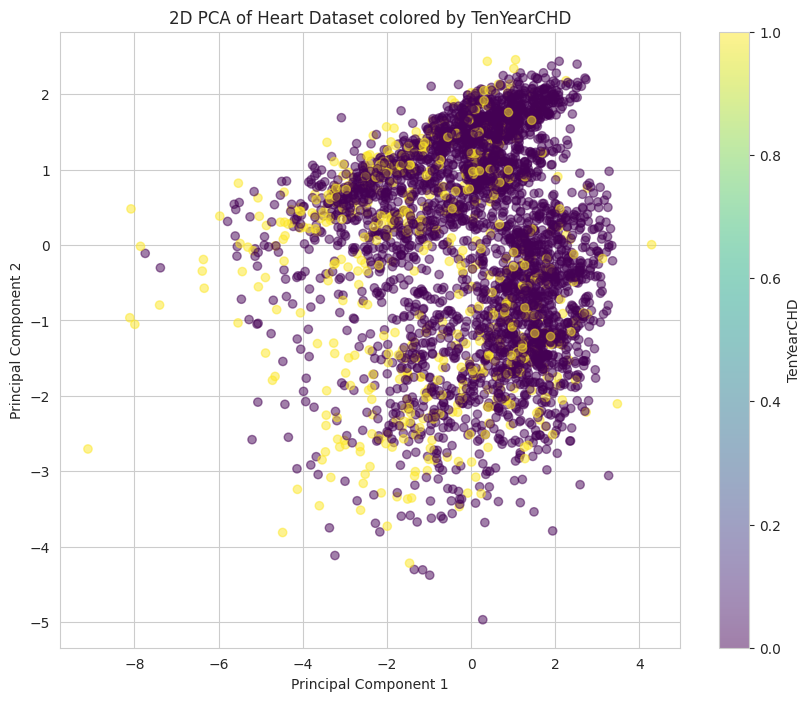

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(PCs_df['PC1'], PCs_df['PC2'], c=y, alpha=0.5, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Heart Dataset colored by TenYearCHD')
plt.colorbar(scatter, label='TenYearCHD')
plt.grid(True)
plt.show()

***I am plotting a bar and step chart to visualize the explained variance by each principal component and the cumulative explained variance, respectively.***

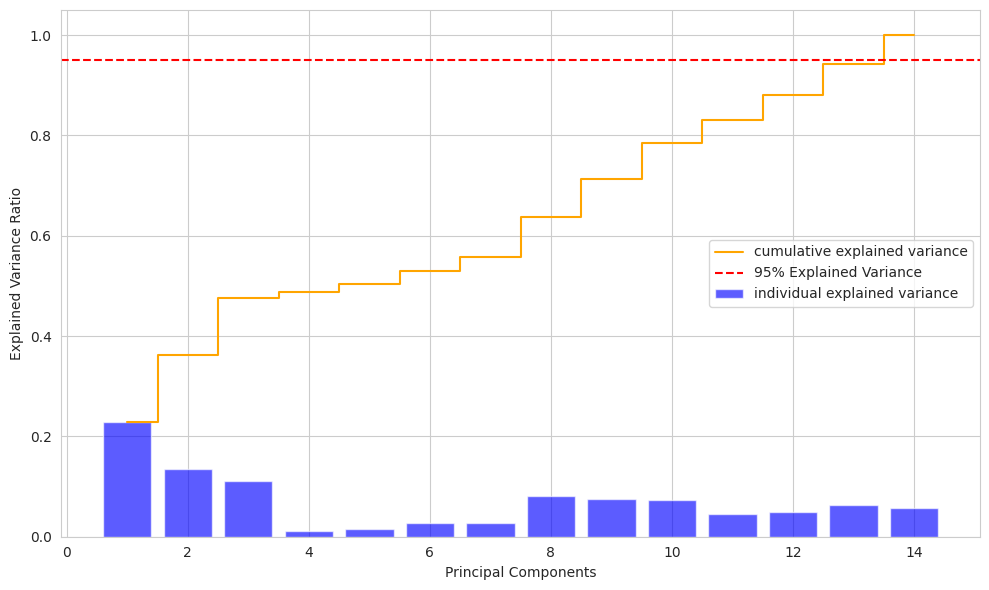

In [ ]:
# Calculate the explained variance ratios from the eigenvalues
total_variance = sum(eigenvalues)
explained_variance_from_eigenvalues = [ev/total_variance for ev in eigenvalues]

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_from_eigenvalues) + 1), explained_variance_from_eigenvalues, alpha=0.64, align='center', label='individual explained variance',color='blue')
plt.step(range(1, len(explained_variance_from_eigenvalues) + 1), np.cumsum(explained_variance_from_eigenvalues), where='mid', label='cumulative explained variance',color='orange')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Explained Variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


In [ ]:
PCs_df = pd.read_csv('/content/drive/MyDrive/AMLBS_Assignments/heart_disease_prediction/PCA.csv')

In [ ]:
PCs_df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0,1.590687,0.982623,0.093545,-0.167695,-0.009876,-0.282480,0.379187,0.582484,1.200087,0.745099,-0.470970,1.204347,0.344379,0.821651
1,1,-0.003748,1.287115,-0.163128,0.116434,0.157329,0.207116,-0.063177,-1.490302,0.426582,0.506259,0.185262,0.561756,0.849638,1.035286
2,2,1.123890,-1.411163,-0.164331,-0.189034,-0.177449,0.368169,-0.126307,0.325291,-0.043340,-0.534157,-0.111955,0.320282,0.246678,0.202701
3,3,-1.502967,-1.720207,0.107693,0.562774,0.695591,-0.771385,-0.262300,0.255228,-0.236745,-0.392962,1.526216,-1.531043,-0.467484,-0.952829
4,4,0.708115,-1.034444,0.173697,0.106307,0.243496,0.203033,-0.533966,-1.641354,-0.958073,-0.263111,-0.239825,-0.590111,0.246870,0.189097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,3676,-2.072827,-1.203060,-0.489596,-1.014976,-1.331344,-0.524297,0.092294,0.525451,-0.088302,-1.300669,-1.394563,-0.782665,0.009840,-0.362622
3677,3677,2.053492,-2.376955,-0.127390,-0.002087,1.296376,0.570647,-0.232667,0.856040,-0.598940,-0.518815,0.029614,0.081662,-0.564739,-1.157046
3678,3678,-0.170922,1.521297,0.622898,0.057679,0.265209,-0.217833,-0.975944,-0.948606,-0.597360,-0.328037,-0.652199,0.096515,0.073220,-0.434353
3679,3679,-0.865148,0.124271,-0.884419,0.362092,0.001650,-0.237655,0.592327,1.304256,1.709756,0.991679,-1.338177,-0.037252,-0.487047,-0.644972


In [ ]:
PCs_df1 = PCs_df.iloc[:,1:]
PCs_df1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,1.590687,0.982623,0.093545,-0.167695,-0.009876,-0.282480,0.379187,0.582484,1.200087,0.745099,-0.470970,1.204347,0.344379,0.821651
1,-0.003748,1.287115,-0.163128,0.116434,0.157329,0.207116,-0.063177,-1.490302,0.426582,0.506259,0.185262,0.561756,0.849638,1.035286
2,1.123890,-1.411163,-0.164331,-0.189034,-0.177449,0.368169,-0.126307,0.325291,-0.043340,-0.534157,-0.111955,0.320282,0.246678,0.202701
3,-1.502967,-1.720207,0.107693,0.562774,0.695591,-0.771385,-0.262300,0.255228,-0.236745,-0.392962,1.526216,-1.531043,-0.467484,-0.952829
4,0.708115,-1.034444,0.173697,0.106307,0.243496,0.203033,-0.533966,-1.641354,-0.958073,-0.263111,-0.239825,-0.590111,0.246870,0.189097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,-2.072827,-1.203060,-0.489596,-1.014976,-1.331344,-0.524297,0.092294,0.525451,-0.088302,-1.300669,-1.394563,-0.782665,0.009840,-0.362622
3677,2.053492,-2.376955,-0.127390,-0.002087,1.296376,0.570647,-0.232667,0.856040,-0.598940,-0.518815,0.029614,0.081662,-0.564739,-1.157046
3678,-0.170922,1.521297,0.622898,0.057679,0.265209,-0.217833,-0.975944,-0.948606,-0.597360,-0.328037,-0.652199,0.096515,0.073220,-0.434353
3679,-0.865148,0.124271,-0.884419,0.362092,0.001650,-0.237655,0.592327,1.304256,1.709756,0.991679,-1.338177,-0.037252,-0.487047,-0.644972


In [ ]:
#Approximately 9 principal components explain the 95% of variance, so I would go by taking those components
selected_pca_df = PCs_df1.iloc[:,0:9]
selected_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.590687,0.982623,0.093545,-0.167695,-0.009876,-0.282480,0.379187,0.582484,1.200087
1,-0.003748,1.287115,-0.163128,0.116434,0.157329,0.207116,-0.063177,-1.490302,0.426582
2,1.123890,-1.411163,-0.164331,-0.189034,-0.177449,0.368169,-0.126307,0.325291,-0.043340
3,-1.502967,-1.720207,0.107693,0.562774,0.695591,-0.771385,-0.262300,0.255228,-0.236745
4,0.708115,-1.034444,0.173697,0.106307,0.243496,0.203033,-0.533966,-1.641354,-0.958073
...,...,...,...,...,...,...,...,...,...
3676,-2.072827,-1.203060,-0.489596,-1.014976,-1.331344,-0.524297,0.092294,0.525451,-0.088302
3677,2.053492,-2.376955,-0.127390,-0.002087,1.296376,0.570647,-0.232667,0.856040,-0.598940
3678,-0.170922,1.521297,0.622898,0.057679,0.265209,-0.217833,-0.975944,-0.948606,-0.597360
3679,-0.865148,0.124271,-0.884419,0.362092,0.001650,-0.237655,0.592327,1.304256,1.709756


# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Extracting the target variable which was initially stored in y or df['TenYearCHD']
target = y

# Splitting the selected principal components and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_pca_df, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2944, 9), (737, 9), (2944,), (737,))

In [ ]:
#Checking if the training set is imbalanced or balanced
y_train.value_counts()

0    2502
1     442
Name: TenYearCHD, dtype: int64

*We can clearly see that the training set is imbalanced as there are significantly smaller number of samples for Class 1 compared to Class 0.*

# OverSampling(SMOTE technique)

In [ ]:
#Applying Resampling(oversampling for making the training set more balanced)

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable in the resampled training set
resampled_class_distribution = y_train_resampled.value_counts()

resampled_class_distribution


0    2502
1    2502
Name: TenYearCHD, dtype: int64

# Model Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn.pipeline import Pipeline
classifiers = [
    LogisticRegression(max_iter=10000, random_state=42),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=2)
]
accuracy_scores=[]
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)
    accuracy = pipe.score(X_test, y_test) * 100

    accuracy_scores.append(accuracy)
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier.__class__.__name__, accuracy))


The accuracy score of LogisticRegression is: 83.85%
The accuracy score of SVC is: 83.58%
The accuracy score of DecisionTreeClassifier is: 73.54%
The accuracy score of KNeighborsClassifier is: 81.82%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize dictionary to store results for each classifier
results = {}

# Iterate through each classifier, make predictions, and compute precision, recall, and F1-score
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results in the dictionary
    results[classifier.__class__.__name__] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print()

results


{'LogisticRegression': {'Precision': 0.6666666666666666,
  'Recall': 0.08064516129032258,
  'F1-Score': 0.14388489208633093},
 'SVC': {'Precision': 1.0,
  'Recall': 0.024193548387096774,
  'F1-Score': 0.047244094488188976},
 'DecisionTreeClassifier': {'Precision': 0.19658119658119658,
  'Recall': 0.18548387096774194,
  'F1-Score': 0.19087136929460577},
 'KNeighborsClassifier': {'Precision': 0.2916666666666667,
  'Recall': 0.056451612903225805,
  'F1-Score': 0.09459459459459459}}

# **Model Pipeline with HyperParameter Tuning using GridSearchCV**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the classifiers with their hyperparameter grids for tuning
classifiers = [
    {
        'name': 'Logistic Regression',
        'classifier': LogisticRegression(max_iter=10000, random_state=42),
        'params': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    {
        'name': 'SVC',
        'classifier': SVC(random_state=42),
        'params': {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf', 'poly'],
        }
    },
    {
        'name': 'Decision Tree',
        'classifier': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'KNeighbors Classifier',
        'classifier': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [2, 3, 4, 5],
            'classifier__weights': ['uniform', 'distance']
        }
    }
]

# Create a list to store the best classifiers after tuning
best_classifiers = []

# Iterate through classifiers and perform hyperparameter tuning
for classifier_info in classifiers:
    classifier = classifier_info['classifier']
    params = classifier_info['params']

    # Create a pipeline with the classifier
    pipe = Pipeline(steps=[('classifier', classifier)])

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipe, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best classifier and its parameters
    best_classifier = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the best classifier on the test set
    y_pred = best_classifier.predict(X_test)
    report = classification_report(y_test, y_pred)
    # Print the classification report
    print(f"Classification Report for {classifier_info['name']} (Best Params: {best_params}):")
    print(report)

    # Store the best classifier for later use
    best_classifiers.append({'name': classifier_info['name'], 'classifier': best_classifier, 'best_params': best_params})

# You can access the best classifiers and their parameters from best_classifiers list


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

Classification Report for Logistic Regression (Best Params: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       613
           1       0.78      0.06      0.11       124

    accuracy                           0.84       737
   macro avg       0.81      0.53      0.51       737
weighted avg       0.83      0.84      0.78       737

Classification Report for SVC (Best Params: {'classifier__C': 10, 'classifier__kernel': 'poly'}):
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       613
           1       0.50      0.04      0.07       124

    accuracy                           0.83       737
   macro avg       0.67      0.52      0.49       737
weighted avg       0.78      0.83      0.77       737

Classification Report for Decision Tree (Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__m

The accuracy score of Logistic Regression is: 83.85%
The precion score of Logistic Regression is: 0.78
The recall score of Logistic Regression is: 0.06
The F1 score of Logistic Regression is: 0.11
Classification report of Logistic Regression is:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       613
           1       0.78      0.06      0.11       124

    accuracy                           0.84       737
   macro avg       0.81      0.53      0.51       737
weighted avg       0.83      0.84      0.78       737

Confusion Matrix for Logistic Regression is:


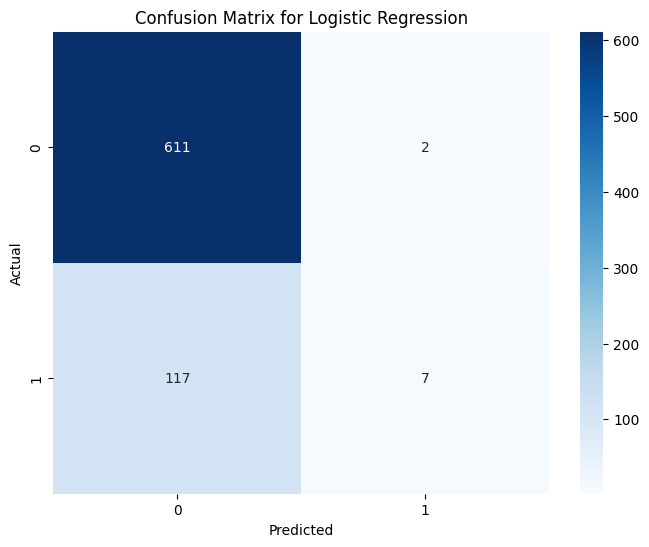

----------------------------------------------
The accuracy score of SVC is: 83.18%
The precion score of SVC is: 0.50
The recall score of SVC is: 0.04
The F1 score of SVC is: 0.07
Classification report of SVC is:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       613
           1       0.50      0.04      0.07       124

    accuracy                           0.83       737
   macro avg       0.67      0.52      0.49       737
weighted avg       0.78      0.83      0.77       737

Confusion Matrix for SVC is:


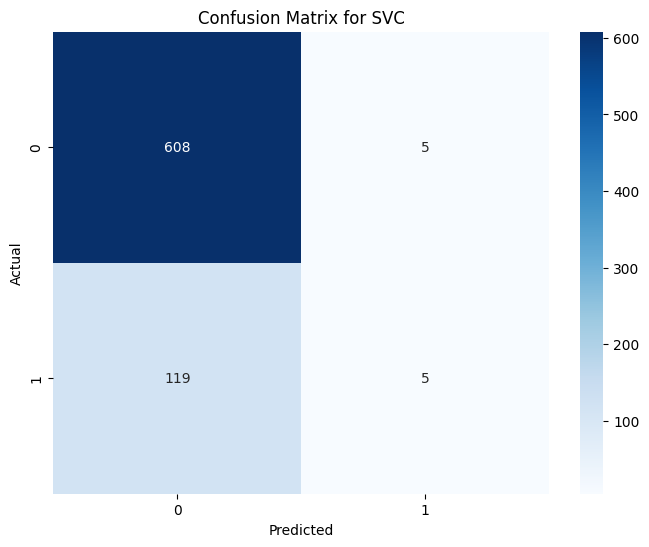

----------------------------------------------
The accuracy score of Decision Tree is: 78.83%
The precion score of Decision Tree is: 0.23
The recall score of Decision Tree is: 0.11
The F1 score of Decision Tree is: 0.15
Classification report of Decision Tree is:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       613
           1       0.23      0.11      0.15       124

    accuracy                           0.79       737
   macro avg       0.54      0.52      0.52       737
weighted avg       0.74      0.79      0.76       737

Confusion Matrix for Decision Tree is:


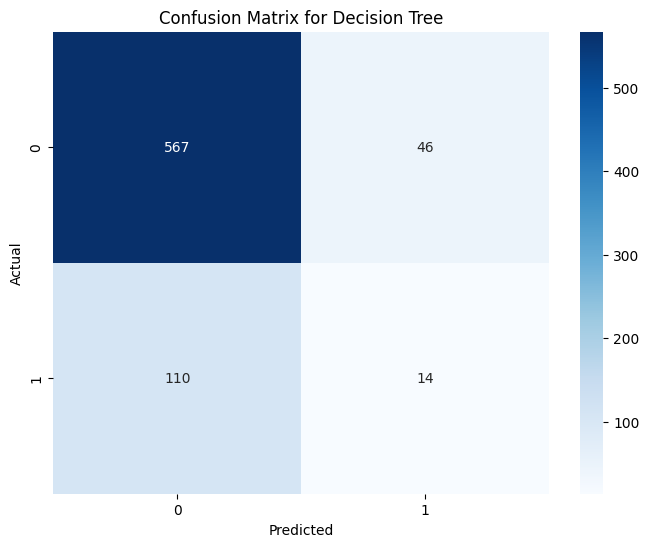

----------------------------------------------
The accuracy score of KNeighbors Classifier is: 83.04%
The precion score of KNeighbors Classifier is: 0.46
The recall score of KNeighbors Classifier is: 0.05
The F1 score of KNeighbors Classifier is: 0.09
Classification report of KNeighbors Classifier is:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       613
           1       0.46      0.05      0.09       124

    accuracy                           0.83       737
   macro avg       0.65      0.52      0.50       737
weighted avg       0.77      0.83      0.77       737

Confusion Matrix for KNeighbors Classifier is:


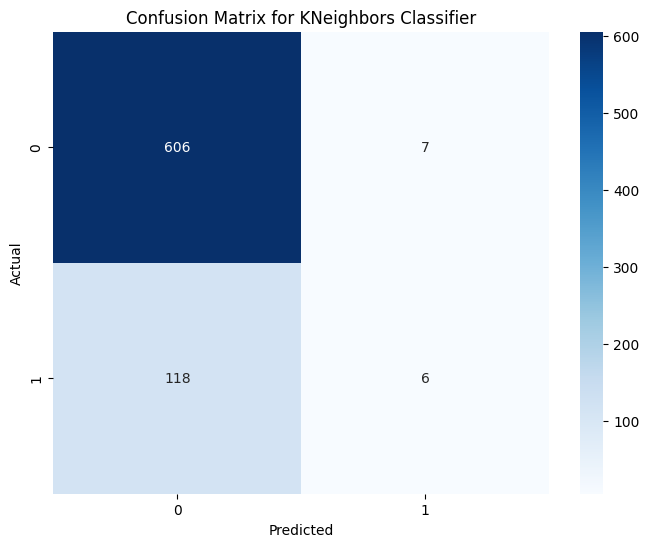

----------------------------------------------


In [ ]:
for best_classifier_info in best_classifiers:
    best_classifier = best_classifier_info['classifier']
    classifier_name = best_classifier_info['name']

    # Fit the best classifier on the entire training set
    best_classifier.fit(X_train, y_train)
    y_pred = best_classifier.predict(X_test)
    # Calculate accuracy,precion,recall,f1-score on the test set
    accuracy = best_classifier.score(X_test, y_test) * 100
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test,y_pred)
    print(f"The accuracy score of {classifier_name} is: {accuracy:.2f}%")
    print(f"The precion score of {classifier_name} is: {precision:.2f}")
    print(f"The recall score of {classifier_name} is: {recall:.2f}")
    print(f"The F1 score of {classifier_name} is: {f1:.2f}")
    print(f"Classification report of {classifier_name} is:")
    print(report)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {classifier_name} is:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.show()
    print('----------------------------------------------')


